In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FormatStrFormatter
from matplotlib.animation import FuncAnimation
plt.style.use('ggplot')

In [17]:
#Ruta para guardar las graficas
guardar = '..\Visualizaciones'

<>:2: SyntaxWarning: invalid escape sequence '\V'
<>:2: SyntaxWarning: invalid escape sequence '\V'
C:\Users\Andres\AppData\Local\Temp\ipykernel_8216\2676260054.py:2: SyntaxWarning: invalid escape sequence '\V'
  guardar = '..\Visualizaciones'


In [4]:
def grafica_lollipop(data, texto):
  """
  Cambia el valor del Elo

  Args:
    data (df): Data que se graficara
    texto (str): Texto para el titulo del grafico
  """
  plt.figure(figsize=(15, 10))
  df = data.iloc[:, [0,-1]]
  df = df[df[df.columns[-1]]>0]

  df = df.sort_values(by = df.columns[-1]).reset_index(drop = True, inplace = False)

  plt.hlines(y=df.Equipo, xmin=0, xmax=df[df.columns[-1]])
  plt.plot(df[df.columns[-1]], df.Equipo, "o")
  plt.gca().get_xaxis().set_visible(False)

  for i in range(len(df.Equipo)):
    plt.text(df.at[i, df.columns[-1]] + 1, i-0.1, f"{df.at[i, df.columns[-1]]:,.1f}%")

  plt.title(f'Probabilidad de {texto} \n Basado en la jornada {df.columns[-1][-1]}')

  path = guardar + f'/{texto}_lollipop.png'
  plt.savefig(path, dpi=100)

  plt.show()

In [5]:
ruta = '../Data/Historial/campeones.csv'
ruta1 = '../Data/Historial/champion.csv'
ruta2 = '../Data/Historial/europa.csv'
ruta3 = '../Data/Historial/descenso.csv'

In [6]:
Campeones = pd.read_csv(ruta, index_col = 'Equipo')
Champion = pd.read_csv(ruta1)
Europa = pd.read_csv(ruta2)
Descenso = pd.read_csv(ruta3)

# Graficas campeones

In [7]:
Campeones = Campeones.sort_values(by = Campeones.columns[-1], ascending = False)
Campeones

,J0,J1,J2,J3,J4,J5,J6,J7
Equipo,,,,,,,,
Real Madrid,81.9,72.3,71.2,61.1,59.0,56.3,55.0,53.1
Barcelona,13.0,21.3,22.2,33.3,33.0,39.3,41.3,44.2
Atlético Madrid,3.4,5.1,5.2,3.5,6.3,4.0,3.4,2.6
Athletic Club,0.7,0.1,0.2,0.3,0.1,0.1,0.0,0.1
Betis,0.1,0.0,0.1,0.0,0.0,0.0,0.0,0.0
Girona,0.5,1.2,1.0,1.7,1.6,0.3,0.2,0.0
Real Sociedad,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Villarreal,0.1,0.0,0.1,0.1,0.0,0.0,0.1,0.0


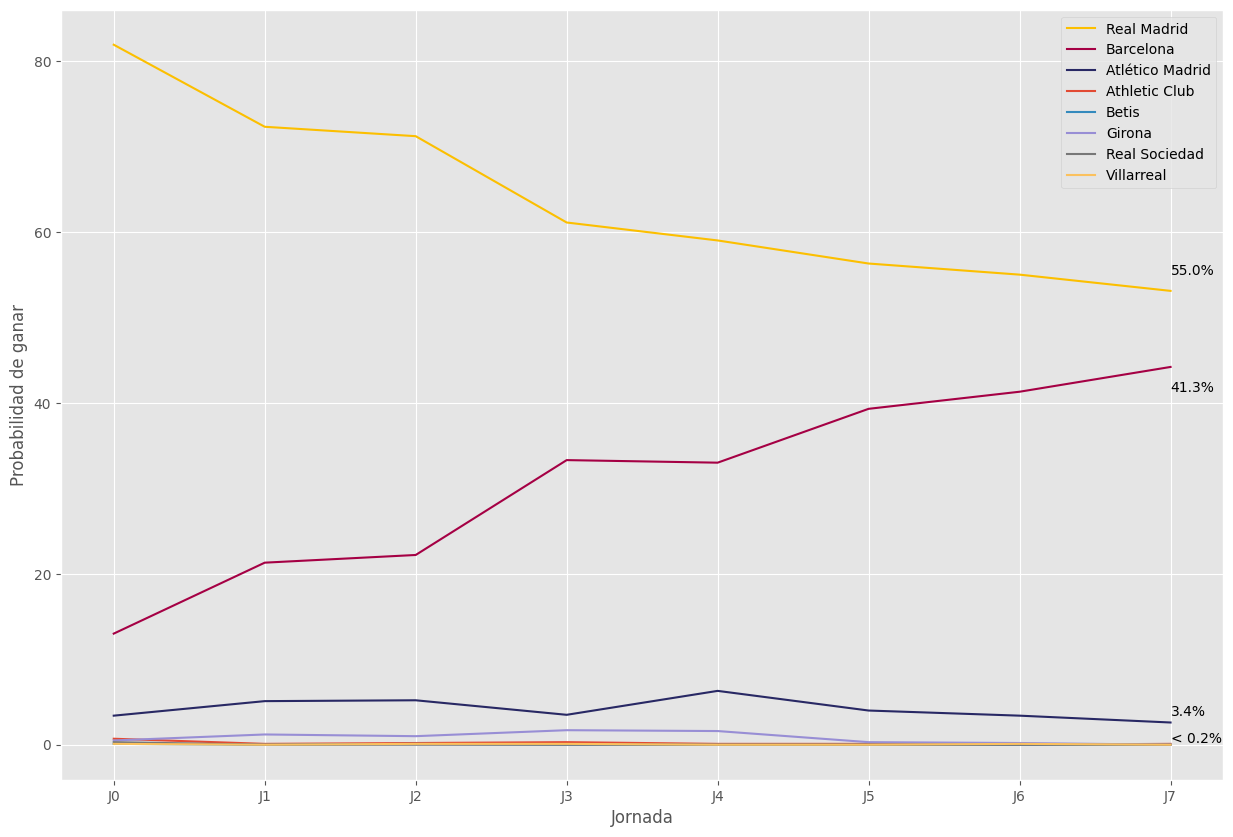

In [8]:
colores = {'Real Madrid': '#fcbf00', 'Barcelona' :'#a50044', 'Atlético Madrid': '#282864'}
plt.subplots(figsize=(15, 10))
for idx, i in enumerate(Campeones.index):
  if idx < 3:
    plt.plot(Campeones.columns, Campeones.T[i], label = i, color = colores[i])
  else:
    plt.plot(Campeones.columns, Campeones.T[i], label = i)

for i in Campeones.T.values[6][:]:
  if i > 0.2:
    plt.text(Campeones.columns[-1], i, f"{i:,.1f}%")

plt.text(Campeones.columns[-1], 0.2, "< 0.2%")

plt.xlabel('Jornada')
plt.ylabel('Probabilidad de ganar')
plt.legend()
path = guardar + '/Campeones.png'
plt.savefig(path, dpi=100)
plt.show()

MovieWriter ffmpeg unavailable; using Pillow instead.


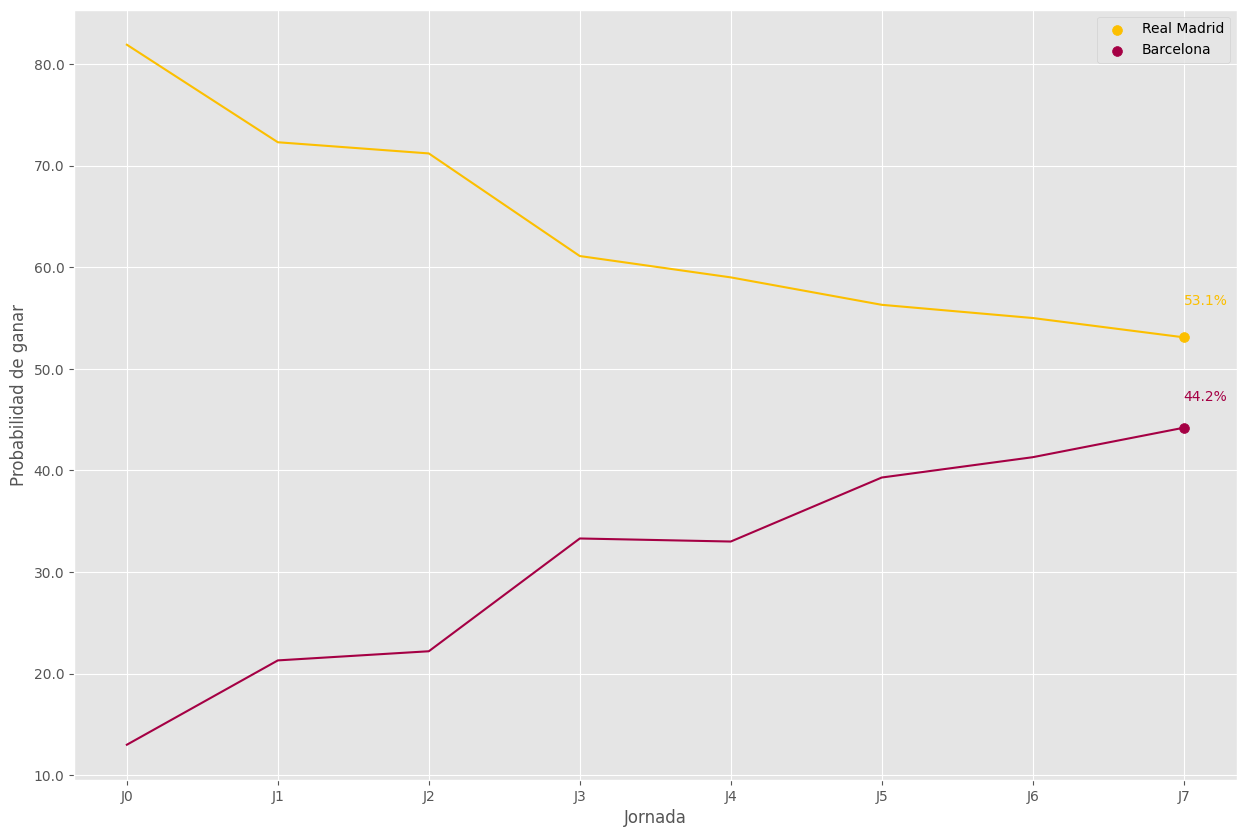

In [9]:
animacion = {'Real Madrid': '#fcbf00', 'Barcelona' :'#a50044'}
fig, ax = plt.subplots(figsize=(15, 10), dpi = 100)
def update(frame):

    if frame == 0:
        return None

    subset_df = Campeones.T.iloc[:frame]
    ax.clear()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

    for i in animacion:
      ax.plot(subset_df.index, subset_df[i], color = animacion[i])
      ax.scatter(subset_df.index[-1], subset_df[i].values[-1], s=50, label = i, color = animacion[i])
      plt.text(subset_df.index[-1], subset_df[i].values[-1]*1.06, f"{subset_df[i].values[-1]:,.1f}%", color = animacion[i])

    ax.legend()
    plt.xlabel('Jornada')
    plt.ylabel('Probabilidad de ganar')

path = guardar + '/Probabilidad_Mejores_Equipos.gif'
ani = FuncAnimation(fig, update, frames= len(Campeones) + 3)
ani.save(path, fps=1)

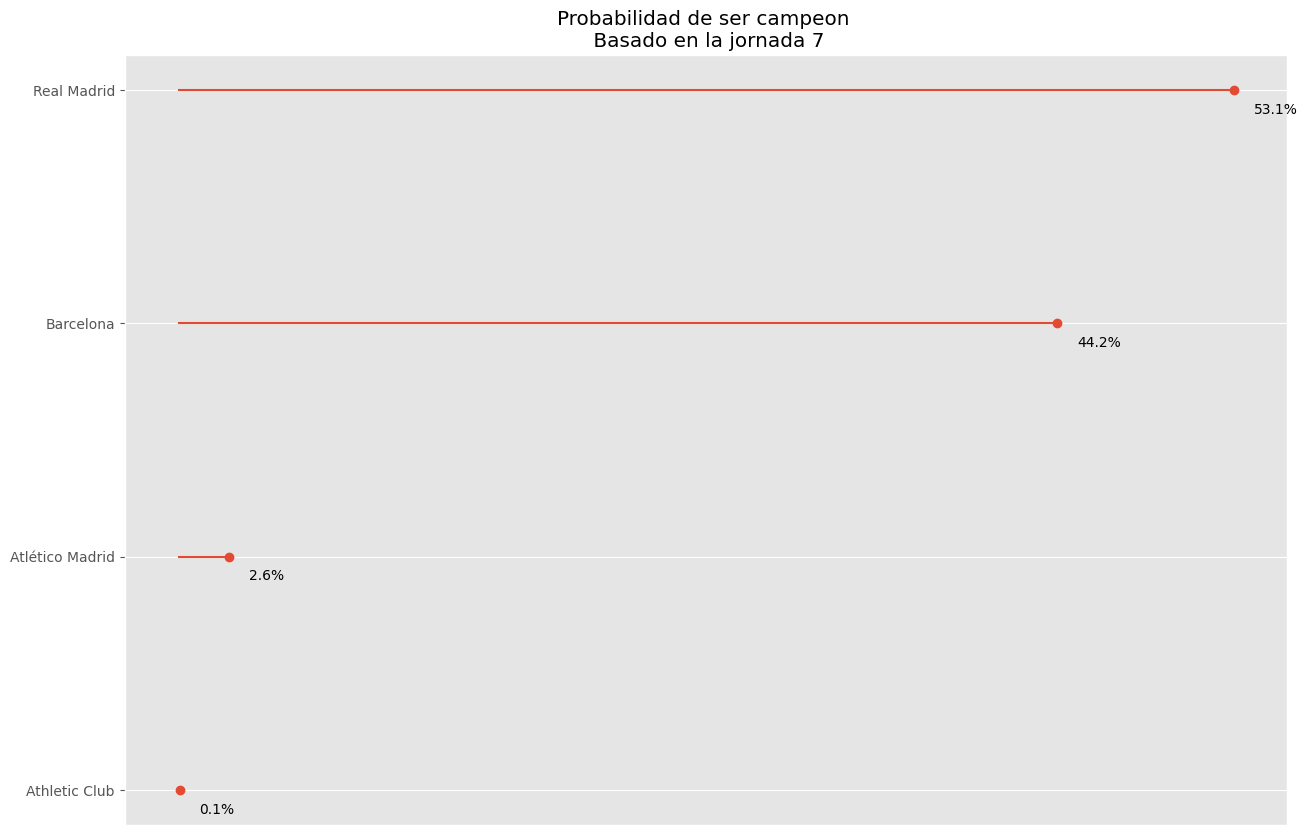

In [10]:
grafica_lollipop(Campeones.reset_index(), 'ser campeon')

# Champions League

In [11]:
Champion

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7
0,Alavés,0.8,1.3,0.2,2.2,2.3,1.2,1.6,3.1
1,Athletic Club,36.9,33.2,27.6,33.5,19.6,27.5,31.6,47.0
2,Atlético Madrid,79.3,78.2,82.6,77.2,87.0,88.0,90.2,93.6
3,Barcelona,92.8,96.9,96.5,98.4,98.7,99.6,99.9,99.8
4,Betis,9.8,9.2,9.6,11.4,9.2,9.6,9.3,6.5
5,Celta Vigo,2.7,2.6,5.1,2.2,1.3,1.5,1.4,2.0
6,Espanyol,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Getafe,0.3,0.6,0.5,0.5,0.2,0.1,0.2,0.0
8,Girona,46.0,50.6,44.8,46.6,61.8,43.7,40.3,20.2
9,Las Palmas,0.0,0.1,0.1,0.0,0.0,0.0,0.1,0.0


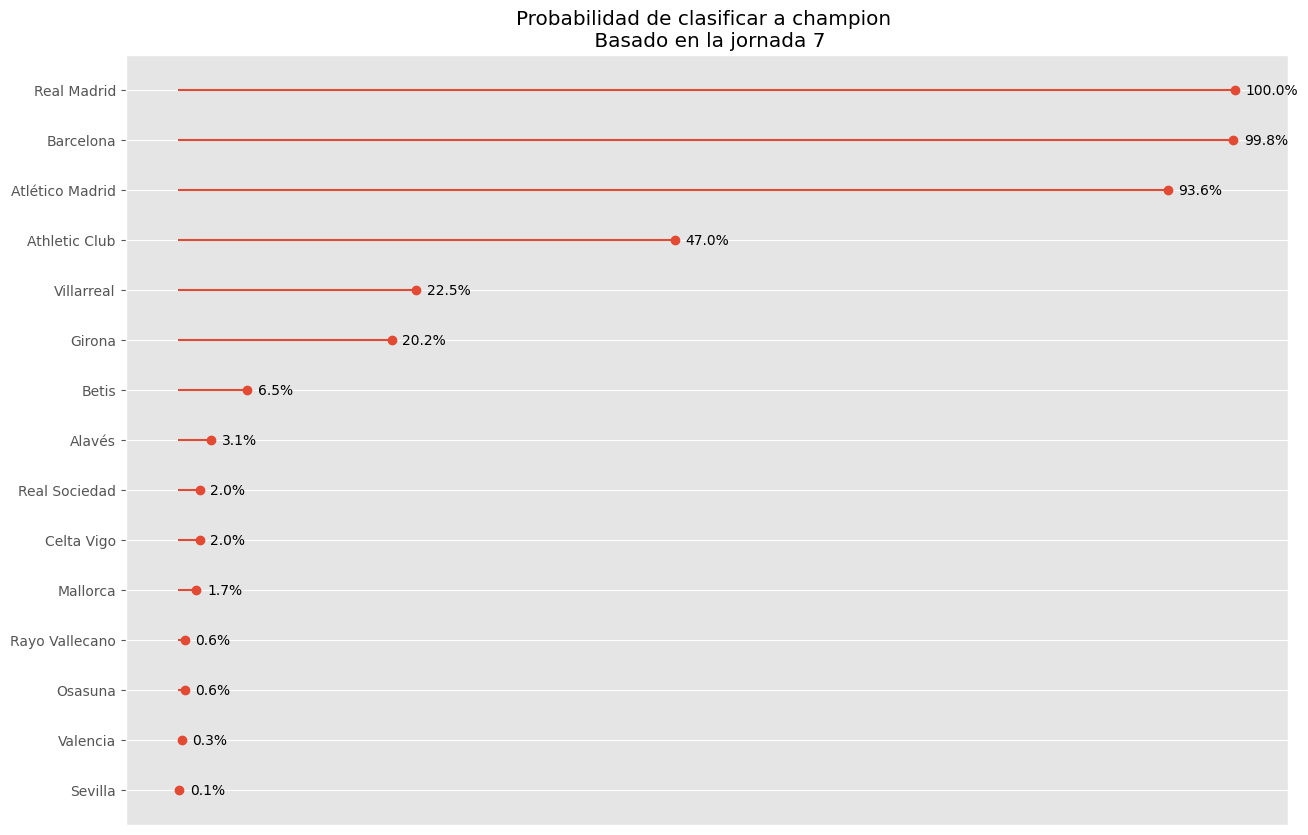

In [12]:
grafica_lollipop(Champion, 'clasificar a champion')

# Europa League

In [13]:
Europa

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7
0,Alavés,6.3,3.9,4.2,7.3,13.0,6.0,10.0,12.2
1,Athletic Club,34.9,35.2,34.7,37.2,39.2,39.9,42.0,36.8
2,Atlético Madrid,15.4,16.1,13.8,17.4,11.4,10.9,8.2,5.7
3,Barcelona,6.1,2.7,3.3,1.5,1.2,0.3,0.1,0.2
4,Betis,24.6,26.0,25.6,26.0,29.7,29.2,24.9,22.4
5,Celta Vigo,6.9,9.2,14.1,10.1,8.3,10.0,9.1,8.4
6,Espanyol,0.3,0.1,0.0,0.0,0.0,0.7,0.4,0.2
7,Getafe,1.5,3.1,3.4,2.2,2.0,0.7,1.2,0.7
8,Girona,32.4,32.9,34.1,32.8,26.6,37.8,36.8,42.8
9,Las Palmas,0.2,0.2,0.2,0.1,0.3,0.1,0.2,0.0


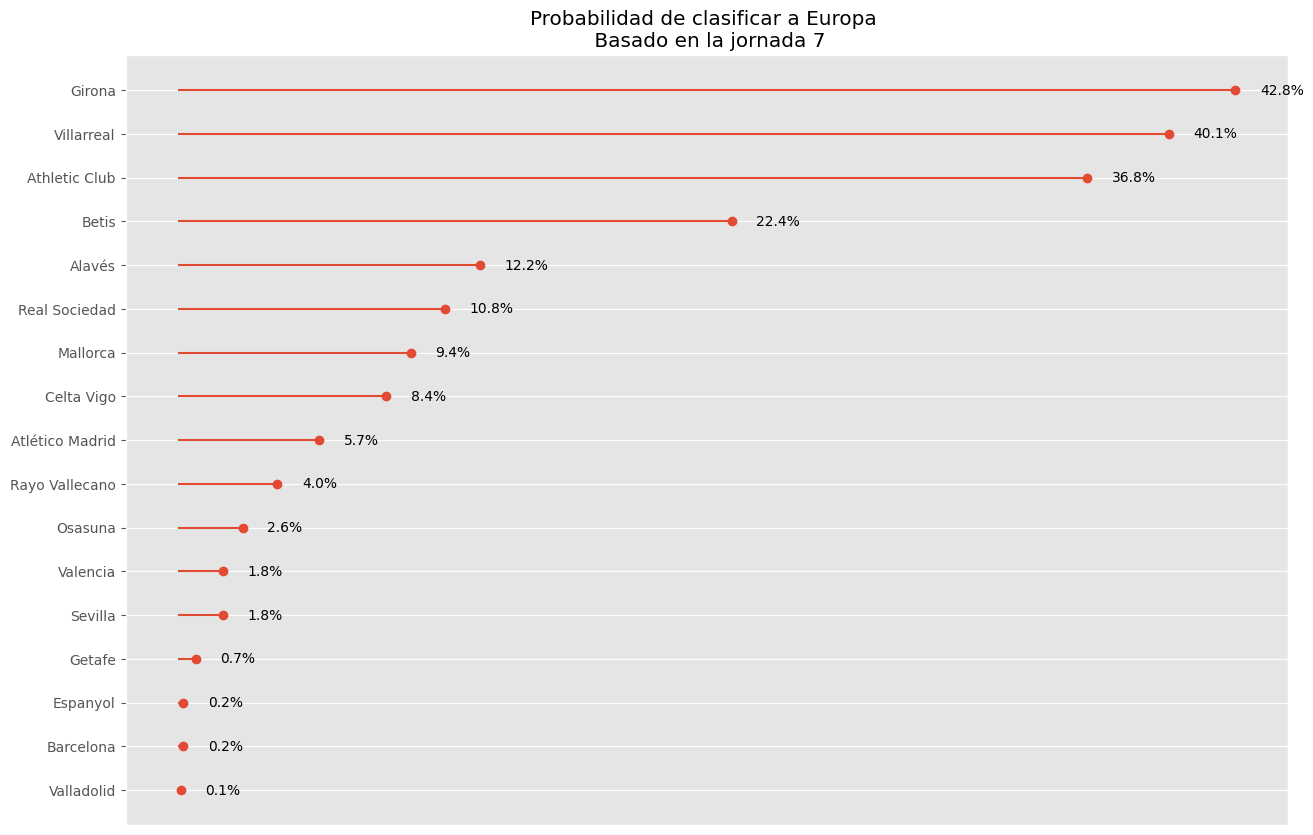

In [14]:
grafica_lollipop(Europa, 'clasificar a Europa')

# Descender a segunda division

In [16]:
Descenso

,Equipo,J0,J1,J2,J3,J4,J5,J6,J7
0,Alavés,5.2,8.4,7.8,2.9,1.3,1.9,2.1,1.1
1,Athletic Club,0.0,0.0,0.0,0.2,0.0,0.1,0.0,0.0
2,Betis,0.5,0.7,0.5,0.1,0.2,0.0,0.2,0.4
3,Celta Vigo,4.3,2.8,1.3,1.5,2.9,0.9,1.4,2.0
4,Espanyol,45.7,60.1,69.5,59.2,44.6,28.9,32.4,33.2
5,Getafe,13.0,11.7,12.6,13.3,13.3,17.2,20.4,25.2
6,Girona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1
7,Las Palmas,35.8,40.2,42.9,41.1,46.4,56.9,60.3,64.8
8,Leganés,70.3,69.0,58.5,57.1,65.8,68.7,69.0,75.4
9,Mallorca,11.1,9.3,14.2,15.8,7.6,11.0,8.1,2.2


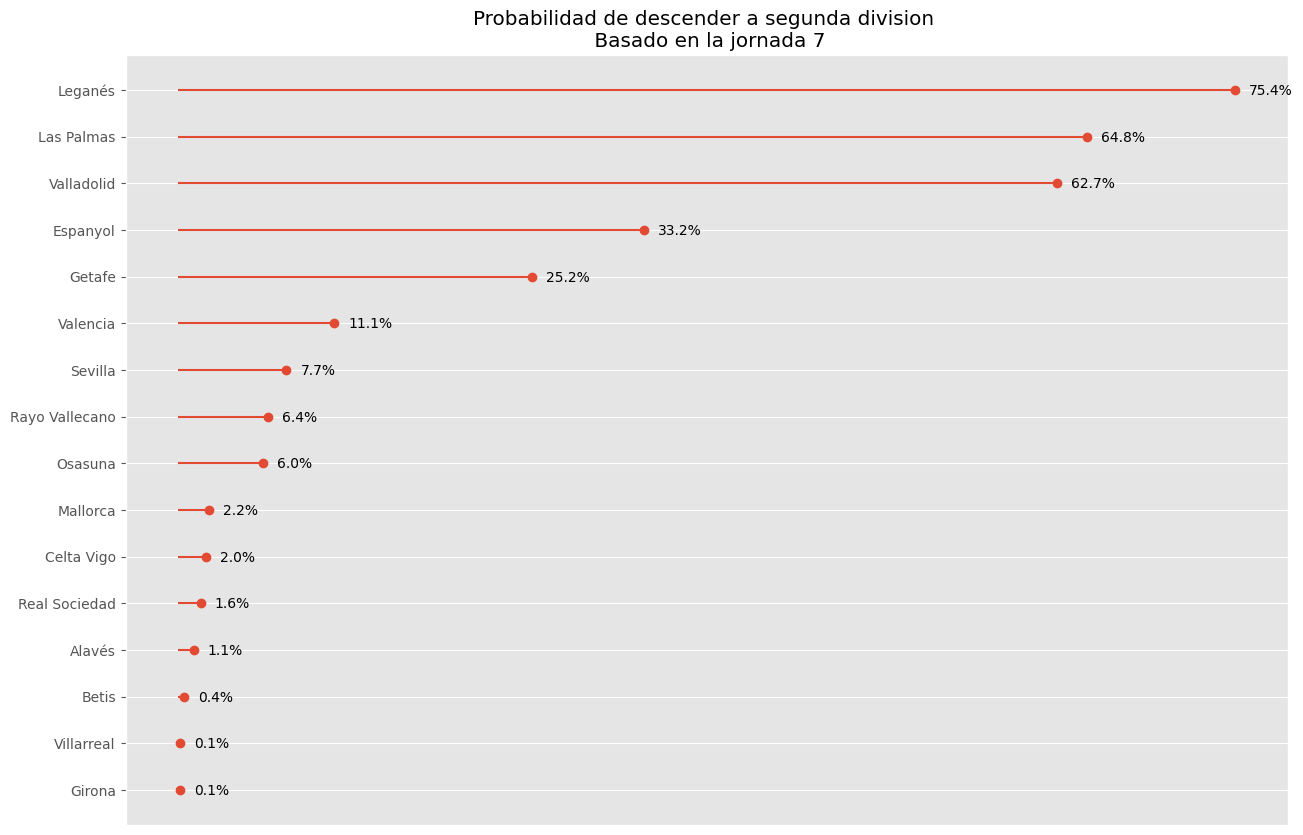

In [15]:
grafica_lollipop(Descenso, 'descender a segunda division')